In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_X_df, get_y_df, data_prep, NORMALIZER
from model_arch import build_model
from hyperparameters import EPOCHS, LEARNING_RATE, BATCH_SIZE
from matplotlib import pyplot as plt

2023-07-08 14:13:54.335779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 14:13:54.361838: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 14:13:54.362446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 14:13:55.000866: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../../../data/csv/plant_data.csv"

In [4]:
X = get_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
X_train, X_test, y_train, y_test = data_prep(X, y)

In [5]:
NORMALIZER.adapt(X_train)

2023-07-08 14:13:56.479304: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-08 14:13:56.479872: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
model = build_model(NORMALIZER)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,460
Trainable params: 18,433
Non-trainable params: 27
_________________________________________________________________


In [8]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.1
)

Epoch 1/250
5/5 [==============================] - 0s 25ms/step - loss: 6164.1938 - val_loss: 11525.0205
Epoch 2/250
5/5 [==============================] - 0s 5ms/step - loss: 6067.0547 - val_loss: 11353.5020
Epoch 3/250
5/5 [==============================] - 0s 5ms/step - loss: 5957.9663 - val_loss: 11131.5000
Epoch 4/250
5/5 [==============================] - 0s 5ms/step - loss: 5813.1284 - val_loss: 10838.9023
Epoch 5/250
5/5 [==============================] - 0s 41ms/step - loss: 5636.0107 - val_loss: 10451.7852
Epoch 6/250
5/5 [==============================] - 0s 5ms/step - loss: 5381.3022 - val_loss: 9941.2949
Epoch 7/250
5/5 [==============================] - 0s 5ms/step - loss: 5068.3423 - val_loss: 9267.6895
Epoch 8/250
5/5 [==============================] - 0s 5ms/step - loss: 4642.9507 - val_loss: 8434.8809
Epoch 9/250
5/5 [==============================] - 0s 5ms/step - loss: 4134.6411 - val_loss: 7459.2480
Epoch 10/250
5/5 [==============================] - 0s 5ms/step - 

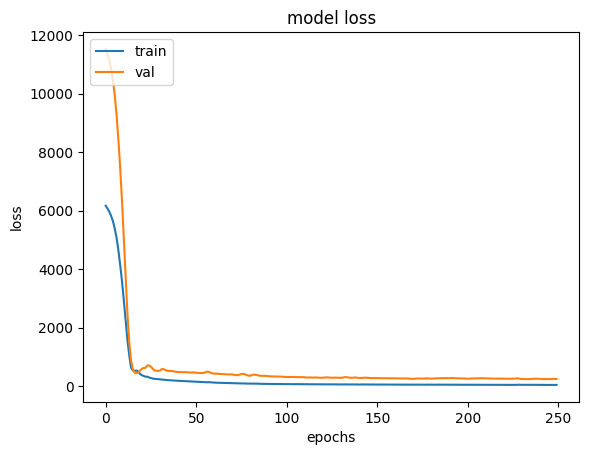

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 20.7842


20.7841796875